# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

## What we are covering:
1. Data (prepare and load)
2. Build model
3. Fitting the model to data (training)
4. Making predictions and evaluating a model (inference)
5. Saving and loading a model
6. Putting it all together


In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neuronal networks
import matplotlib.pyplot as plt
import numpy as np

## 1. Data (prepare and load)

Data can be almos anything in machine learning.

* Excel speadsheet
* Images of any king
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numercial representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [3]:
# Create *known* parameters
weight = .7
bias  = .3

# Create some random input data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) 
y = weight* X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Splitting data into training and test set (one of the most importat concepts on machine learning in general)

**Generalization**: The ability for a machine learning model to perform well on data it hasn't seen before.

Let's create a training and test set with our data

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
X_train[:10], y_train[:10], X_test, y_test

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [6]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
	plt.figure(figsize=(10,7))
	
	# Plot training data in blue
	plt.scatter(train_data, train_labels, c = "b", s=5, label="training data") 
	
	# Plot test data in green
	plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")
	
	# Are there predictions?
	if predictions is not None:
		# Plot the predictions if they exist
		plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
		
	# SHow the legend
	plt.legend(prop={"size":14})

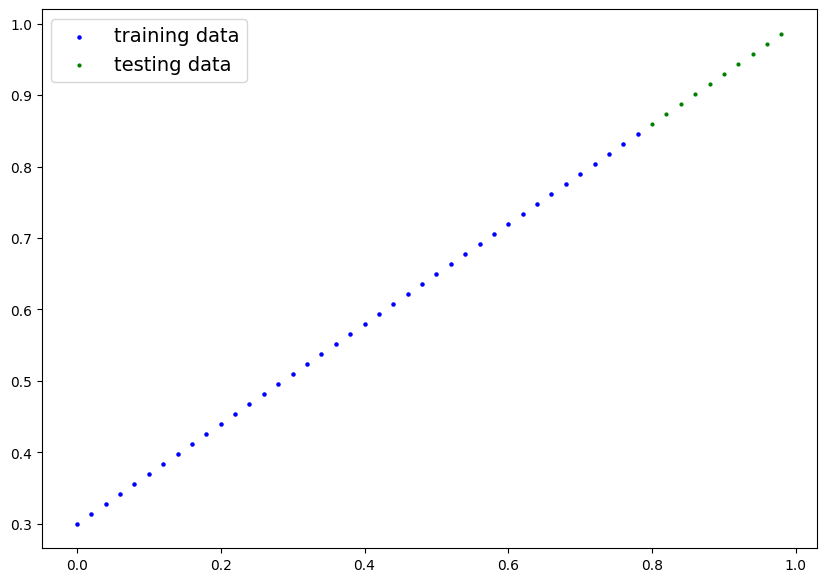

In [7]:
plot_predictions()

## 2. Build our model

What or model does:
1. Start with random numbers (weight and bias)
2. Look at training data and adjust the random values to better represent (or get closer to) the ideas values (The weight and bias values we used to create the data)

How does it do so?

Though two main algorithms:
1. Gradient descent: An optimization algorithm used to minimize a function. It does this by taking steps proportional to the negative of the gradient (the direction of steepest descent) of the function at the current point.
2. Backpropagation: 
 

In [8]:
# Create a linear regression model class

class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherits from nn.Module
	def __init__(self):
		super().__init__()
		self.weights = nn.Parameter(torch.randn(1, 
										 requires_grad=True, # requires_grad=True means PyTorch will keep track of the gradients
										 dtype=torch.float))
		
		self.bias = nn.Parameter(torch.randn(1,
									   requires_grad=True,
									  dtype=torch.float))
		
		# Any subclass of nn.module need to override forward() (this defines the computation in the model)
	def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
		return self.weights * x + self.bias # @ is matrix multiplication

## Pytorch model building essentials

* torch.nn - contains all  o f the buildings for computational graph ( a neural network can be considered a computational graph)
* torch.nn.Parameter - What parameters should or model try and learn. often a PyTorch layer from torch.nn will set these for us
* torch.nn.module - The base class for all neural network modules. if you subclass it, you should overwrite forward()
* torch.optim - This is where the optimizers in PyTorch  live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

## Checking the content of our PyTorch models

Now we've created a model, let's see what's inside 

In [9]:
# Create a random seed
torch.manual_seed(42) 

# Create an instance of the model (this is a sub class of nn.Module)
model = LinearRegressionModel()

# Check out the parameters
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`

when we pass data trough our model, it's going to run it trough the `forward()` method.

In [11]:
# Make predictions with model
with torch.inference_mode():
	y_preds = model(X_test)
	
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

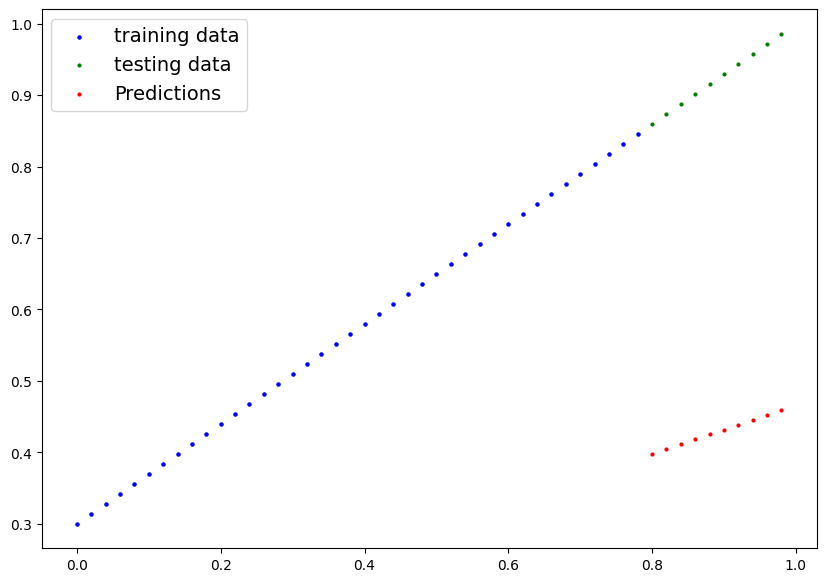

In [12]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *uknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models prediction are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function**: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer**: An algorithm that helps the model find the best parameters to minimize the loss function.

And specifically for PyTorch, we need:

* A training loop
* A testing loop

In [13]:
# Check out our model parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model.parameters(),
							lr=0.01) # lr = learning rate, possibly the most important hyperparameter you can set

## Building a training and a testing loop in pyTorch

A couple of things we need in a training loop:

0. Loop through the data 
1. Forward pass (this involves data moving though our model's `forward()` functions) to make predictions data - also called propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward- move backward through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [ ]:
# An epoch is one loop through the data...

epoch = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epoch):
	# Set the model to train mode
	model.train() # train model in PyTorch sets all parameters that require gradients to require gradients

	# 1. Forward pass
	y_pred = model(X_train)

	# 2. Calculate the loss
	loss = loss_fn(y_pred, y_train)

	# 3. Optimizer zero grad
	optimizer.zero_grad()

	# 4. Loss backward
	loss.backward()

	# 5. Optimizer step
	optimizer.step() # By default how the optimizer changes will accumulate  through the loop so we have to zero them above in step 3 for the iteration of the loop
	
	### Testing
	model.eval() # turns off different setting in model not needed for evaluation/testing (dropout/batch norm layers)
	with torch.inference_mode(): # Turn off gradient tracking and a couple more things behind the scenes
		# 1. Do the forward pass
		test_pred = model(X_test)

		# 2. Calculate the loss
		test_loss = loss_fn(test_pred, y_test)

	# Print out what's happenin'
	if epoch % 10 == 0:
		epoch_count.append(epoch)
		loss_values.append(loss)
		test_loss_values.append(test_loss)
		print(f"Epoch {epoch} | Loss: {loss} | Test loss: {test_loss}")		



Epoch 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Epoch 140 | Loss

In [16]:
np.array(torch.tensor(loss_values).cpu().numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

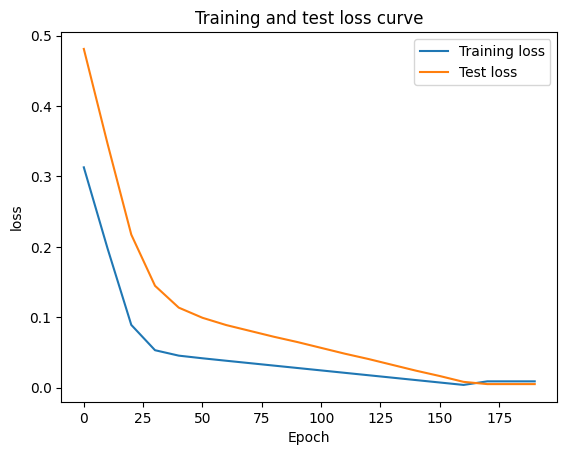

In [17]:
# Plot the loss values over the epochs
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Training loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend()

In [18]:
print(model.state_dict())
print(f"[+] Desired values: {weight}, {bias}")

OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})
[+] Desired values: 0.7, 0.3


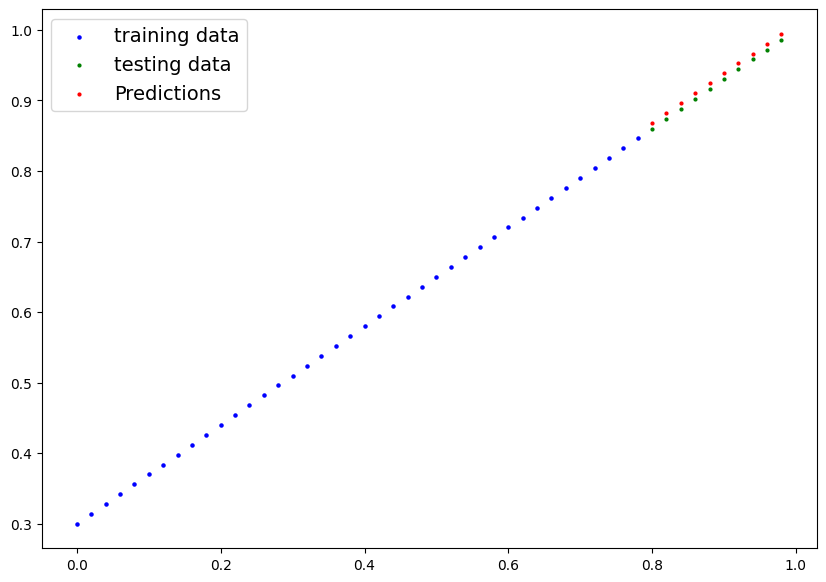

In [19]:
with torch.inference_mode():
    y_preds_new = model(X_test)

plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should knwo about for saving and loading model in PyTorch

1. `torch.save`: This function saves entire model in a single file. It saves both the model's architecture and the model's state_dict.

2. `torch.nn.Module.load_state_dict`: 

3. `torch.load`: This function loads the entire model from a file.

In [20]:
# Saving our Pytorch model
from pathlib import Path

# 1. Create model directory
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

#2. Create model save path
model_name = "01_pytorch_workflow_model.pt"
model_save_path = model_path / model_name

# 3. Save model state dict
torch.save(obj=model.state_dict(), f=model_save_path)

print(f"[+] Model saved at: {model_save_path}")

[+] Model saved at: models/01_pytorch_workflow_model.pt


## Loading a Pytorch model

Since we saved our model's `sate_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [21]:
model.state_dict 

<bound method Module.state_dict of LinearRegressionModel()>

In [ ]:
# To load in a saved state_dict we have to instance a new instance of our model class

loaded_model = LinearRegressionModel()

# See the initial parameters of the loaded model class
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [24]:
# Load the saved state_dict of model (this will update the new instance with updated parameters)
loaded_model.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [25]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
# Make some predictions with our loaded model
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

loaded_model_preds, y_preds_new

(tensor([[0.8685],
         [0.8825],
         [0.8965],
         [0.9105],
         [0.9245],
         [0.9384],
         [0.9524],
         [0.9664],
         [0.9804],
         [0.9944]]),
 tensor([[0.8685],
         [0.8825],
         [0.8965],
         [0.9105],
         [0.9245],
         [0.9384],
         [0.9524],
         [0.9664],
         [0.9804],
         [0.9944]]))

In [29]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])